#  Assignment 3 - Natural Language Generation 💬

Welcome to the **third and last assignment** for the **CS-552: Modern NLP course**!

> - 😀 Name: **Emmanouil Chatzakis**
> - ✉️ Email: **emmanouil.chatzakis@epfl.ch**
> - 🪪 SCIPER: **353068**

In [1]:
# TODO: Please enter you sciper as a variable below
SCIPER = 353068
USE_COLAB = False

<div style="padding:15px 20px 20px 20px;border-left:3px solid green;background-color:#e4fae4;border-radius: 20px;">

## **Assignment Description**
- In this assignment, you will be looking at natural language generation (NLG), precisely the task of summarization. You will be exploring ways to generate text and how fine-grained decisions of decoding parameters can affect the generations.
    
- You will not need to train any models in this assignment. A pretrained one is provided for you by Huggingface.
    
- In Part 1, you will implement two decoding algorithms (greedy and beam search), as well as two sampling algorithms (top-p and top-k) to replicate (to some extent) what one would get when using Huggingface's `generate` function that you've played with during the Week 7's exercise session.
    
- For Part 2, you will analyze how varying specific parameters of decoding and sampling algorithms can qualitatively affect the generation.

- For Part 3, you will answer some questions on interpreting automatic NLG evaluation metrics.

### Table of Contents
- **[Setup](#setup)**
    - [1) Google Setup](#1-google-colab-setup)
    - [2) Local Setup](#2-local-setup)
    - [3) Rest of the Setup](#3-rest-of-the-setup-colab-and-local)

- **[Introduction: T5 Primer](#introduction-t5-primer)**

- **[PART 1: Natural Language Generation Decoding and Sampling Algorithms](#part-1-natural-language-generation-decoding-and-sampling-algorithms)**
    - [1.1) Implement decoding and sampling algorithms](#11-implement-decoding-and-sampling-algorithms)
    - [1.2) Test your implementations](#12-testing-your-implementation)
    
- **[PART 2: Qualitative Evaluation of Generation Parameters](#part-2-qualitative-evaluation-of-generation-parameters)**
    - [2.1) Beam size for beam-search](#21-beam-size-for-beam-search)
    - [2.2) Length penalty for beam-search](#22-length-penalty-for-beam-search)
    - [2.3) Top-k for top-k](#23-top-k-for-top-k)
    - [2.4) Temperature for top-p](#25-temperature-for-top-p)

- **[PART 3: Reflection on Automatic NLG Evaluation Metrics](#part-3-reflection-on-automatic-nlg-evaluation-metrics)**
    - [3.1) Description](#31-description)
    - [3.2) Task](#32-task)

- **[PART 4: Checklist](#part-4-checklist)**
    
### Deliverables

To give us the deliverables you will have to commit the following files if your github classroom repository:

- ✅ The python files:
    - [ ] `a3_decoding.py`
    - [ ] `a3_sampling.py`
    - [ ] `a3_utils.py`, if you added any helper functions

- ✅ This jupyter notebook `a3_notebook.py` with 
    - [ ] the answers to Part 2 questions written out in their corresponding cells.
        - [ ] Answers to (2.1) questions
        - [ ] Answers to (2.2) questions
        - [ ] Answers to (2.3) questions
        - [ ] Answers to (2.4) questions
    - [ ] the answers to Part 3 questions written out in its corresponding cell.

### Expected Workload

We expect the first part of the assignment, notably Beam search, to take the most out of the complete assignment. 
You can plan your workload according to that. Keep in mind that this is just our expectation, not a guarantee.

</div>

## Setup

This assignment doesn't require you to train a model, therefore you don't need a GPU. However, if you would like to get faster generations, you may choose to use Colab with GPUs.

First, if you are using Google Colab, go through part (1) and (3) of the setup section. If not, and you are using a local machine, go through the part (2) and (3) of the setup section.

### 1) Google Colab Setup

PYTHON VERSION: Colab uses **Python version 3.9.16** and that's the python version we will use to grade your assignments. If you use a different Python version, we will not deduct points, but you are taking the risk of showing different results at grading time.

If you are using Google Colab for this assignment, you will need to run a few commands to set up our environment. If you are running this notebook on a local machine you can skip this section.
Run the following cell to mount your Google Drive. Follow the popped window, sign in to your Google account. (The same non-EPFL account you used to store this notebook!)

In [2]:
if USE_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

Now first click the 4th left-side button (named Files), then click the 2nd button that pops under in the columns (named Refresh), under "/drive/MyDrive/" find the Assignment 3 repository folder that you uploaded to your Google Drive, copy its path, and fill it in the cell below. If everything is working correctly, then running the folowing cell should print the filenames from the assignment:

```
['part3_flan_T5_automatic_eval.png', 'requirements_local.txt', 'a3_sampling.py', 'a3_hello.py', 'README.md', 'part3_flan_t5_generations.json', 'a3_decoding.py', 'a3_tests.py', 'part1_input_data.json', 'requirements_colab.txt', 'a3_utils.py', 'a3_notebook.ipynb']
```

In [3]:
if USE_COLAB:
    import os
    # TODO: Fill in the path where you download the Assignment folder into
    ROOT_PATH = "/content/drive/MyDrive/..." # Replace with your directory to A3 folder
    print(os.listdir(ROOT_PATH))

In [4]:
if USE_COLAB:    
    import sys
    sys.path.append(ROOT_PATH)

    from a3_hello import hello_A3
    hello_A3()

Before we start, we also need to run some boilerplate code to set up our environment, same as previous assignments.

In [5]:
if USE_COLAB:
    requirements = ROOT_PATH + "/requirements_colab.txt"
    %pip install -r {requirements}

### 2) Local Setup

PYTHON VERSION: To be consistent with the default Colab settings, we prefer if you all use **Python version 3.9.16**
If you use a different Python version, we will not deduct points, but you are taking the risk of showing different results at grading time.

Below please write your relative filepath to your assignment 3 folder. If everything is working correctly, then running the folowing cell should print the filenames from the assignment:

```
['part3_flan_T5_automatic_eval.png', 'requirements_local.txt', 'a3_sampling.py', 'a3_hello.py', 'README.md', 'part3_flan_t5_generations.json', 'a3_decoding.py', 'a3_tests.py', 'part1_input_data.json', 'requirements_colab.txt', 'a3_utils.py', 'a3_notebook.ipynb']
```

In [6]:
import os
# NOTE: DON'T DO THIS STEP AGAIN IF YOU ARE ON COLAB! Only local!

# TODO: Fill in the path where you download the Assignment folder into
if not USE_COLAB:
    ROOT_PATH = '.' # Replace with A3 directory path
    print(os.listdir(ROOT_PATH))

['part3_flan_T5_automatic_eval.png', 'requirements_local.txt', 'a3_sampling.py', 'a3_hello.py', '__pycache__', 'README.md', '.gitignore', 'part3_flan_t5_generations.json', 'a3_decoding.py', 'a3_tests.py', 'part1_input_data.json', '.git', '.vscode', 'requirements_colab.txt', 'a3_utils.py', 'a3_notebook.ipynb']


Before we start, we also need to run some boilerplate code to set up our environment.

In [7]:
if not USE_COLAB:
    requirements = ROOT_PATH + "/requirements_local.txt"
    %pip install -r {requirements}


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### 3) Rest of the setup (Colab and Local)

Now, run this cell to load the autoreload extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience! Otherwise, you will have to restart your kernel each time you make a change in your python files.

In [8]:
%load_ext autoreload
%autoreload 2

from a3_utils import *
from a3_decoding import *
from a3_sampling import *
from a3_tests import *

import json
import torch
from datasets import load_dataset
from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration
)

seed = SCIPER
torch.manual_seed(seed) # example to set the seed for randomness control
torch.set_printoptions(precision=16) # set print number precision at 16

(Optional) If you would like to setup CUDA with your notebook you can check whether it's available or not. If not, either your local machine doesn't have GPUs (which is fine!) or you need to set GPU setting via `Edit -> Notebook Settings` on Colab.

In [9]:
if torch.cuda.is_available():
  print('Good to go!')
else:
  print('If you are using Colab, and want a GPU (not necessary for this assignment), please set GPU via Edit -> Notebook Settings.')

If you are using Colab, and want a GPU (not necessary for this assignment), please set GPU via Edit -> Notebook Settings.


And that's it! You are ready to start the assignment.

<a name="1"></a>
## **Introduction: T5 Primer**
---

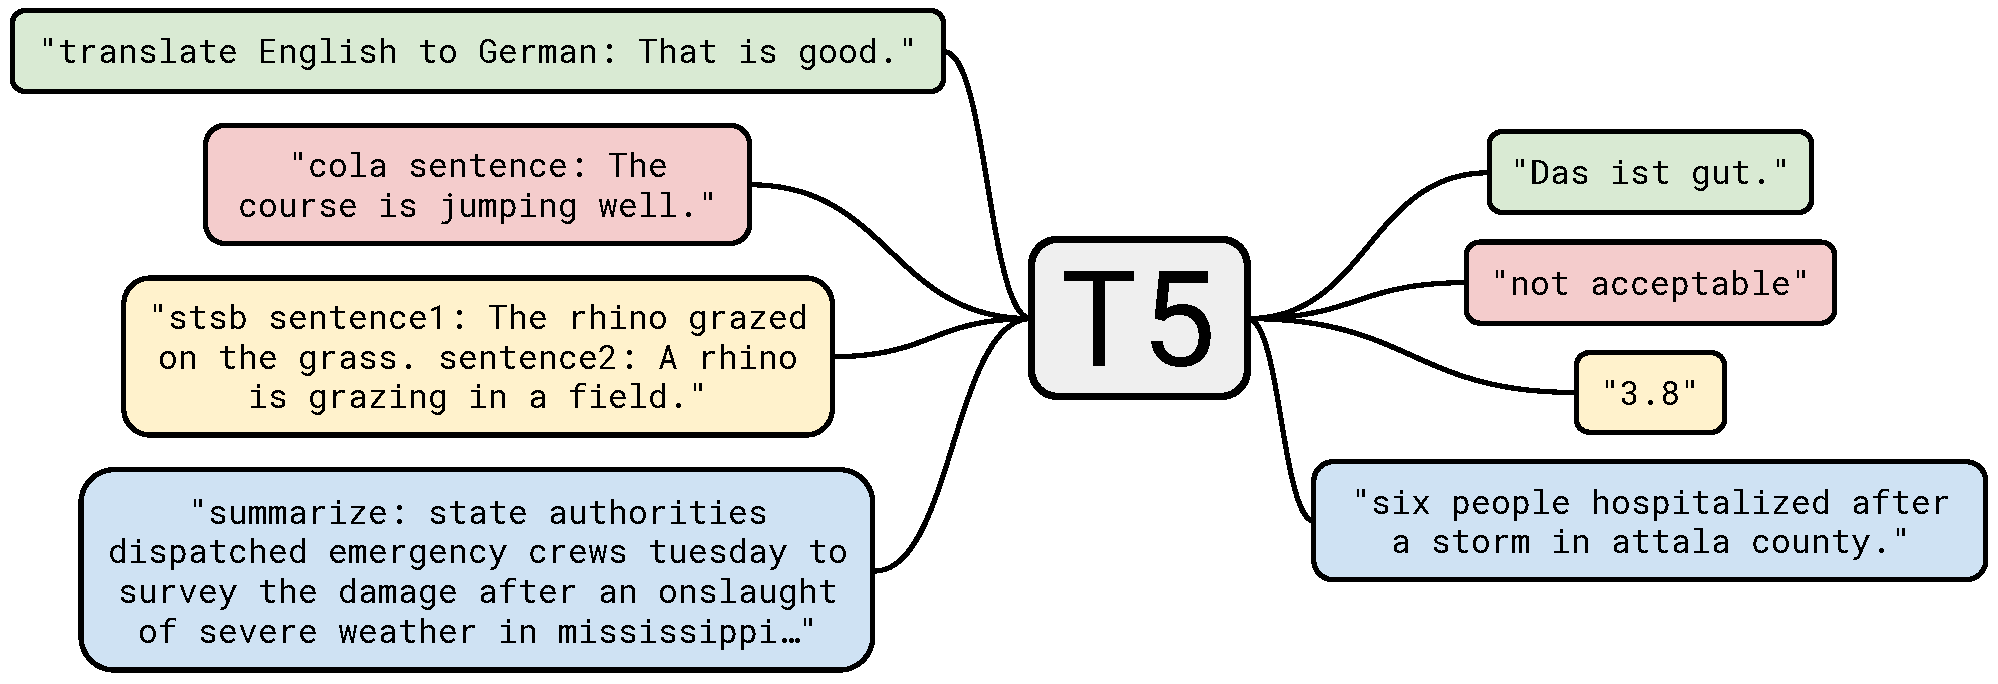

In this assignment, we will primarily use the T5 model to generate summaries and translations of text. As you may have learned in Exercise Week 4, T5 is a Seq2Seq encoder-decoder model based on the Transformer architecture. It was developed by a team at Google [(Raffel et al., JMLR 2020)](https://arxiv.org/abs/1910.10683) to unify and test the extent of transferability of text-to-text tasks such as translation, summarization, question answering, and the like in a single model.

It's been trained to take the input text as an encoder input. This input text typically has a prefix, which can be considered as an instruction on what to do with respect to the input text when the decoder starts generating.

T5 then expects the decoder inputs to start with a `<pad>` token, after which we can let it generate by, for example, choosing the highest probability tokens. But is this really the best way to create our generations? Let's find out!

## **PART 1: Natural Language Generation Decoding and Sampling Algorithms**
---

### 1.1) Implement decoding and sampling algorithms

For this part of the assignment, you will be implementing decoding and sampling algorithms that are in `a3_decoding.py` and `a3_sampling.py` files. These files include a main function that print the behavior of your own implementation and the huggingface implementation.

The NLG algorithms will be specifically for the `T5ForConditionalGeneration` model (provided by the `transformers` package) and its `t5-small` variant. While we provide a way to input the encoder and decoder input ids to the model, we highly recommend you closely look at the [documentation](https://huggingface.co/docs/transformers/model_doc/t5#transformers.T5ForConditionalGeneration) whenever you feel the need for clarification. **We do not allow you to use the huggingface `generate` function.**

Remember that there are several ways to keep track of generation scores and that sampling can be affected by the specific package you choose. Therefore if the output does not match exactly huggingface's output for sampling algorithms, you don't have to worry.

Please carefully read the detailed docstrings and the comments that start with `TODO` / `NOTE: caution`. While the `TODO`s will show where you should add code, the caution notes will point out what not to change.

Important points to not miss:

#### ⚠️ **Note: Do not use huggingface's `generate` function. The point of the exercise is for you to write parts of `generate`'s behavior.**

#### ⚠️ **Note: Feel free to add testing cells below those already provided in this notebook. You are also welcome to write tests in the main function of `decoding.py` and `sampling.py`. Just make sure not to change the a3_tests.py file!**

#### ⚠️ **Note: Decoding algorithms expectations - your greedy decoder output should match huggingface's output. Sometimes for beam search, due to floating point precision or simply the way huggingface counts scores (thresholding log probabilities), your scores may not align with theirs. Just aim for it to be around the same ballpark. We are not measuring how well you can replicate huggingface's implementation to the exact number. Therefore we will be flexible about this as long as your algorithm does the steps required. Also, a num_beams larger than 15 can run longer than a minute; you don't have to write the most efficient beam search!** ⚠️

#### ⚠️ **Note: Sampling algorithms expectations - due to the random seed not being completely set right before sampling time in huggingface's implementation, your results may widely differ.**

Here is a reasonable order to implement the classes and features in these python files, although you are welcome to do it in a different order:
- [ ] Implement the `GreedySearchDecoderForT5` class in `a3_decoding.py`
- [ ] Implement the `BeamSearchDecoderForT5` class in `a3_decoding.py` without *length_penalty*
- [ ] Add *length_penalty* to the `BeamSearchDecoderForT5` class in `decoding.py`
- [ ] Implement the `TopKSamplerForT5` class in `a3_sampling.py` without *temperature*
- [ ] Implement the `TopPSamplerForT5` class in `a3_sampling.py` without *temperature*
- [ ] Add *temperature* functionality to both `TopKSamplerForT5` and `TopPSamplerForT5`

You can modify the main function in these files to test your functions. We have also created the following cells to call your functions and see if they implement most features we request. These tests do not cover all cases. We don't expect you to throw errors when the inputs don't match their constraints, but whenever the constraints are not met, we return None and print statements to help you debug.

### 1.2) Testing your implementation

Let's first load up the relevant language modeling class and its tokenizers. Then we will create instances of our decoding and sampling classes in the testing subsection.

In [10]:
# 1) Load model and tokenizer
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# 2) Load relevant inputs
with open(os.path.join(ROOT_PATH, "part1_input_data.json"), 'r') as read_file:
    input_data = json.load(read_file)
print("-" * 50)
t5_paper_abstract = input_data["t5_paper_abstract"]
print("T5 Abstract:")
print(t5_paper_abstract)
print("-" * 50)

xsum_train_article_example = input_data["xsum_train_article_example"]
print("XSUM Article Example:")
print(xsum_train_article_example)
print("-" * 50)

opusbooks_train_translation_example = input_data["opusbooks_train_translation_example"]
print("Opus Books Translation Example:")
print(opusbooks_train_translation_example)
print("-" * 50)
#
summary_prefix = "summarize: "
translation_prefix = "translate English to French: "
#
abstract_inputs = tokenizer(
    [summary_prefix + t5_paper_abstract], 
    max_length=MAX_T5_SEQ_LENGTH, 
    truncation=True, 
    return_tensors="pt"
)
article_inputs = tokenizer(
    [summary_prefix + xsum_train_article_example],
    max_length=MAX_T5_SEQ_LENGTH, 
    truncation=True, 
    return_tensors="pt"
)  
translation_inputs = tokenizer(
    [translation_prefix + opusbooks_train_translation_example["en"]], 
    max_length=MAX_T5_SEQ_LENGTH, 
    truncation=True, 
    return_tensors="pt"
)  

all_inputs = [
    ("T5 Abstract", abstract_inputs), 
    ["XSUM article", article_inputs], 
    ["Eng-Fr translation", translation_inputs]
]

if torch.cuda.is_available():
    # TODO: if you want a specific GPU, you can choose which device here, 
    #       otherwise picks the default one
    # device_name = 'cuda' # 'cuda:0', 'cuda:1'
    # device = torch.device(device_name)
    # print(f"Putting inputs and model on the GPU device {device_name}.")
    model = model.cuda()
    for _, inputs in all_inputs:
        inputs["input_ids"] = inputs["input_ids"].cuda()
        inputs["attention_mask"] = inputs["attention_mask"].cuda()
    print("All inputs and models are on a GPU device.")
else:
    print("Not putting inputs and model on any GPU device.")

--------------------------------------------------
T5 Abstract:
Transfer learning, where a model is first pre-trained on a data-rich task before being fine-tuned on a downstream task, has emerged as a powerful technique in natural language processing (NLP). The effectiveness of transfer learning has given rise to a diversity of approaches, methodology, and practice. In this paper, we explore the landscape of transfer learning techniques for NLP by introducing a unified framework that converts all text-based language problems into a text-to-text format. Our systematic study compares pre-training objectives, architectures, unlabeled data sets, transfer approaches, and other factors on dozens of language understanding tasks. By combining the insights from our exploration with scale and our new ``Colossal Clean Crawled Corpus'', we achieve state-of-the-art results on many benchmarks covering summarization, question answering, text classification, and more. To facilitate future work on tran

Perfect! Now you can use the following tests to debug the behavior of your model. Feel free to play around with the parameters but do not change the a3_tests.py file. Do not hardcode answers, we will use other datapoints to test your implementation ;)

#### 1) Greedy search test

Greedy search is the first thing you can implement. The output here should match the huggingface implementation. Make sure you implement the *max_new_tokens* parameter behavior right!

In [23]:
# 1) Relevant parameters to greedy search
max_new_tokens = 25

# 2) Run it on the 3 examples
greedy_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens
)

--------------------------------------------------
Greedy Tests
--------------------------------------------------
####################
Input:  T5 Abstract
####################
~ Your Implementation ~
Generated sequence:  <pad>transfer learning has emerged as a powerful technique in natural language processing (NLP) the effectiveness of transfer learning has given rise
Output shape:  torch.Size([1, 26])
--------------------
~ Huggingface Implementation ~
Generated sequence:  <pad>transfer learning has emerged as a powerful technique in natural language processing (NLP) the effectiveness of transfer learning has given rise
Output shape:  torch.Size([1, 26])


####################
Input:  XSUM article
####################
~ Your Implementation ~
Generated sequence:  <pad>german german says he can see the finishing line after tearing cruciate knee ligaments. the 26-year
Output shape:  torch.Size([1, 26])
--------------------
~ Huggingface Implementation ~
Generated sequence:  <pad>german 

In [24]:
# Check early stopping for greedy search
max_new_tokens = 80

greedy_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens
)

--------------------------------------------------
Greedy Tests
--------------------------------------------------
####################
Input:  T5 Abstract
####################
~ Your Implementation ~
Generated sequence:  <pad> transfer learning has emerged as a powerful technique in natural language processing (NLP) the effectiveness of transfer learning has given rise to a diversity of approaches, methodologies, and practice.</s>
Output shape:  torch.Size([1, 40])
--------------------
~ Huggingface Implementation ~
Generated sequence:  <pad> transfer learning has emerged as a powerful technique in natural language processing (NLP) the effectiveness of transfer learning has given rise to a diversity of approaches, methodologies, and practice.</s>
Output shape:  torch.Size([1, 40])


####################
Input:  XSUM article
####################
~ Your Implementation ~
Generated sequence:  <pad> german german says he can see the finishing line after tearing cruciate knee ligaments. the

#### 2) Beam search test without length penalty

Next, we implement beam search. First, implement it without length penalty and see if the log probability scores you get are roughly close to huggingface's for different beam sizes (particularly smaller ones). The sequence should be mostly the same, independent of the beam width.

In [25]:
# 1) Relevant parameters to beam search
max_new_tokens = 15
num_beams = 4
num_return_sequences = 4
length_penalty = 0.0

# 2) Run it on the 3 examples
beam_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    num_beams,
    length_penalty,
    num_return_sequences,
)

--------------------------------------------------
Beam Tests
--------------------------------------------------
####################
Input:  T5 Abstract
####################
~ Your Implementation ~
1. score: -3.5616003585455474
1. generated sequence: <pad>the effectiveness of transfer learning has given rise to a diversity of approaches,
2. score: -4.881846230011433
2. generated sequence: <pad>transfer learning has emerged as a powerful technique in natural language processing (N
3. score: -5.235852835191508
3. generated sequence: <pad>transfer learning is a powerful technique in natural language processing (NLP)
4. score: -5.270443938439712
4. generated sequence: <pad>transfer learning has emerged as a powerful technique in natural language processing.
Best output shape:  torch.Size([4, 16])
--------------------
~ Huggingface Implementation ~
1. score: -3.5616002082824707
1. generated sequence: <pad>the effectiveness of transfer learning has given rise to a diversity of approaches,
2

#### 3) Beam search test with length penalty

Next, we implement length penalty for beam search. We do so by dividing the score (sum of the log probabilities) by the length of the generation exponentiated by the penalty. 

In [26]:
# 1) Relevant parameters to beam search + penalty
max_new_tokens = 25
num_beams = 5
num_return_sequences = 3
length_penalty = 1.5

# 2) Run it on the 3 examples
beam_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    num_beams,
    length_penalty,
    num_return_sequences,
)

--------------------------------------------------
Beam Tests
--------------------------------------------------
####################
Input:  T5 Abstract
####################
~ Your Implementation ~
1. score: -0.03927122253984073
1. generated sequence: <pad>our systematic study compares pre-training objectives, architectures, unlabeled data sets, transfer approaches, and other
2. score: -0.045970884174422806
2. generated sequence: <pad>transfer learning has emerged as a powerful technique in natural language processing (NLP) the effectiveness of transfer learning has given rise
3. score: -0.04623763076144108
3. generated sequence: <pad>the effectiveness of transfer learning has given rise to a diversity of approaches, methodologies, and practice. in this paper,
Best output shape:  torch.Size([3, 26])
--------------------
~ Huggingface Implementation ~
1. score: -0.03927119821310043
1. generated sequence: <pad>our systematic study compares pre-training objectives, architectures, unlabel

In [27]:
# 1) Relevant parameters to beam search + penalty
max_new_tokens = 25
num_beams = 5
num_return_sequences = 3
length_penalty = -1.5

# 2) Run it on the 3 examples
beam_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    num_beams,
    length_penalty,
    num_return_sequences,
)

--------------------------------------------------
Beam Tests
--------------------------------------------------
####################
Input:  T5 Abstract
####################
~ Your Implementation ~
1. score: -690.2310073602406
1. generated sequence: <pad>our systematic study compares pre-training objectives, architectures, unlabeled data sets, transfer approaches, and other
2. score: -807.9842602496552
2. generated sequence: <pad>transfer learning has emerged as a powerful technique in natural language processing (NLP) the effectiveness of transfer learning has given rise
3. score: -812.6725982630884
3. generated sequence: <pad>the effectiveness of transfer learning has given rise to a diversity of approaches, methodologies, and practice. in this paper,
Best output shape:  torch.Size([3, 26])
--------------------
~ Huggingface Implementation ~
1. score: -690.2305908203125
1. generated sequence: <pad>our systematic study compares pre-training objectives, architectures, unlabeled data s

In [28]:
# Check early stopping for beam search
max_new_tokens = 70
num_beams = 5
num_return_sequences = 3
length_penalty = 0.0

beam_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    num_beams,
    length_penalty,
    num_return_sequences,
)

--------------------------------------------------
Beam Tests
--------------------------------------------------
####################
Input:  T5 Abstract
####################
~ Your Implementation ~
1. score: -8.267927235790921
1. generated sequence: <pad> transfer learning has emerged as a powerful technique in natural language processing (NLP) the effectiveness of transfer learning has given rise to a diversity of approaches, methodologies, and practice.</s><pad><pad><pad>
2. score: -8.49213956805579
2. generated sequence: <pad> the effectiveness of transfer learning has given rise to a diversity of approaches, methodologies, and practice. in this paper, we explore the landscape of transfer learning techniques for natural language processing (NLP)</s>
3. score: -8.764483880642729
3. generated sequence: <pad> transfer learning has emerged as a powerful technique in natural language processing (NLP) the effectiveness of transfer learning has given rise to a diversity of approaches, met

#### 4) Top-K sampling without temperature

Next, we implement top-k sampling. First, implement it without temperature.

In [29]:
# 1) Relevant parameters to top-k sampling
max_new_tokens = 20
top_k = 15
temperature = 1.0
seed = SCIPER

# 2) Run it on the 3 examples
top_k_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    top_k,
    temperature,
    seed
)

--------------------------------------------------
Top-k Tests
--------------------------------------------------
####################
Input:  T5 Abstract
####################
~ Your Implementation ~
Generated sequence:  <pad>transfer learning is a powerful technique in natural language processing. it was developed by a new
Output shape:  torch.Size([1, 21])
--------------------
~ Huggingface Implementation ~
Generated sequence:  <pad>transfer learning is a powerful technique in natural language processing. it was developed by a new
Output shape:  torch.Size([1, 21])


####################
Input:  XSUM article
####################
~ Your Implementation ~
Generated sequence:  <pad>germany international says he will not rush his return for the premier league season. gundog
Output shape:  torch.Size([1, 21])
--------------------
~ Huggingface Implementation ~
Generated sequence:  <pad>germany international says he will not rush his return for the premier league season. gundog
Output shape

#### 5) Top-P sampling without temperature

Then, we implement top-p sampling. First, implement it without temperature.

In [30]:
# 1) Relevant parameters to top-p
max_new_tokens = 20
top_p = 0.92
temperature = 1.0
seed = SCIPER

# 2) Run it on the 3 examples
top_p_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    top_p,
    temperature,
    seed
)

--------------------------------------------------
Top-p Tests
--------------------------------------------------
####################
Input:  T5 Abstract
####################
~ Your Implementation ~
Generated sequence:  <pad>literature calls transfer learning a powerful technique in natural language processing (NLP) the effectiveness of transfer
Output shape:  torch.Size([1, 21])
--------------------
~ Huggingface Implementation ~
Generated sequence:  <pad>literature calls transfer learning a powerful technique in natural language processing (NLP) the effectiveness of transfer
Output shape:  torch.Size([1, 21])


####################
Input:  XSUM article
####################
~ Your Implementation ~
Generated sequence:  <pad>german fighting back on knee ligaments after undergoing back surgery. the 26-year-old
Output shape:  torch.Size([1, 21])
--------------------
~ Huggingface Implementation ~
Generated sequence:  <pad>german fighting back on knee ligaments after undergoing back surge

#### 6) Temperature for both sampling

Now let's test what happens when you implement both sampling algorithms with temperature.

In [32]:
# 1) Relevant parameters to sampling
max_new_tokens = 20
top_k = 15
top_p = 0.92
temperature = 0.7
seed = SCIPER

# 2) Run it on the 3 examples
top_k_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    top_k,
    temperature,
    seed
)

print()
top_p_test(
    model,
    tokenizer,
    all_inputs,
    max_new_tokens,
    top_p,
    temperature,
    seed
)

--------------------------------------------------
Top-k Tests
--------------------------------------------------
####################
Input:  T5 Abstract
####################
~ Your Implementation ~
Generated sequence:  <pad>transfer learning is a powerful technique in natural language processing. it was developed by a new
Output shape:  torch.Size([1, 21])
--------------------
~ Huggingface Implementation ~
Generated sequence:  <pad>transfer learning is a powerful technique in natural language processing. it was developed by a new
Output shape:  torch.Size([1, 21])


####################
Input:  XSUM article
####################
~ Your Implementation ~
Generated sequence:  <pad>germany international says he will not rush his return to the premier league. he will
Output shape:  torch.Size([1, 21])
--------------------
~ Huggingface Implementation ~
Generated sequence:  <pad>germany international says he will not rush his return to the premier league. he will
Output shape:  torch.Size(

## **PART 2: Qualitative Evaluation of Generation Parameters**
---

As seen in Exercise Week 7, automatic NLG evaluation metrics are difficult to interpret. Therefore, NLG often requires careful manual inspection of generations. For this reason, we want you to inspect the following generations qualitatively and answer the follow-up questions (there is a dedicated markdown cell for each question group). Depending on the parameter you are analyzing, a complete answer can range from 2 to 4 sentences.

To observe the different qualitative behavior, we pick a task that T5 has been pretrained with: summarization. We will use the [XSum dataset](https://aclanthology.org/D18-1206/)'s test set and pick an article to summarize.

#### ⚠️ **Note: There is no coding in this part. Instead, the outputs are pre-generated and written in the markdown cell below if the random seed is accidentally modified.**

#### ⚠️ **Content Warning: The following article to be analyzed has sensitive content on a plane crash.**

In [33]:
# 1) Reload model and tokenizer in case you loaded something else earlier
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
tokenizer.model_max_length = 512
model = T5ForConditionalGeneration.from_pretrained(model_name)

# 2) Load the test split of XSum, a summarization dataset
summaries_test = load_dataset("xsum", split='test')
article_id = 102 # NOTE: caution - do not change this!
summary_prefix = "summarize: " # NOTE: we add the "summarize" prefix to the 
#                                      input because of how T5 has been trained
input_ids = tokenizer(
    summary_prefix + summaries_test[article_id]['document'], 
    return_tensors="pt", 
    max_length=512, 
    truncation=True # NOTE: the article gets truncated due to length
).input_ids

# 3) Display the article relevant to Part 2
print("-" * 50)
print("The article that T5 summarizes:")
print("-" * 50)
print(summaries_test[article_id]['document'])

Found cached dataset xsum (/Users/manoschatzakis/.cache/huggingface/datasets/xsum/default/1.2.0/082863bf4754ee058a5b6f6525d0cb2b18eadb62c7b370b095d1364050a52b71)


--------------------------------------------------
The article that T5 summarizes:
--------------------------------------------------
Helio Hermito Zampier Neto, a 31-year-old defender for Chapecoense, was in a stable condition, doctors said, after surgery on a lung, a knee, a wrist and his head.
Five other people survived the crash, which killed 71 people.
Colombian officials say evidence is growing that the plane ran out of fuel.
Miguel Quiroga, the pilot of the British-made Avro RJ85 aircraft, had been warned by an official at Santa Cruz airport, in Bolivia, where the plane took off, that he might not have enough fuel, Bolivian Deber newspaper said.
But, despite the official's concerns, he went ahead with the flight to Medellin. The country's authorities have not yet commented.
In a leaked tape, the pilot can be heard warning of a "total electric failure" and "lack of fuel".
The flight missed a planned refuelling stop in Cobija, on the border between Brazil and Bolivia, because the 

### 2.1) Beam size for beam-search

Given the change in the beam size, analyze the following three generations and answer the relevant questions below.

In [ ]:
print("beam = 8")
beam_output = model.generate(
    input_ids,
    max_new_tokens=100,
    num_beams=8,   
    length_penalty=0.0,
    do_sample=False
)
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

print("-" * 50)
print("beam = 2")
torch.manual_seed(seed)
beam_output = model.generate(
    input_ids,
    max_new_tokens=100,
    num_beams=2,
    length_penalty=0.0,
    do_sample=False
)
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

print("-" * 50)
print("beam = 1")
torch.manual_seed(seed)
beam_output = model.generate(
    input_ids,
    max_new_tokens=100,
    num_beams=1,
    length_penalty=0.0,
    do_sample=False
)
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

**Our generations for the three beam size options:**

---

*beam = 8*

defender Helio Hermito Zampier Neto, 31, is in a stable condition, doctors say. he had surgery on a lung, a knee, a wrist and his head. five others survived the crash, which killed 71 people.

---

*beam = 2*

71 people were killed in the crash at a bolivian airport. the pilot had been warned that he might not have enough fuel. he went ahead with the flight to Medellin.

---

*beam = 1*

71 people died in the crash at the airport in bolivia. the pilot had been warned that he might not have enough fuel. the pilot had the option to refuel in Bogota, it said.

---

#### Questions on (2.1)

1. How did the choice for beam width (*num_beams*) affect the generated summary? Your observation can be about coherence, factual accuracy, conciseness, word choice, overall communication of the news story, format, etc. What is your hypothesis as to why this may be happening, or in other words, why might *num_beams* affect this?

2. Which of these generations do you prefer for the summarization task and why? Is there something lacking from all three generations that you would have chosen to include in your summarization?

3. If the task was something more creative, such as story generation, which *num_beams* between the options above would you prefer?

#### Your Answers to (2.1)

1. In Beam Search decoding, the choice of num_beams parameter highly affects the generation sequence of the model. 
The parameter defines how many alternative sequences the algorithm should keep in every step of the generation, affecting the spectrum of the possible generations we will explore. 
Although keeping track of many sequences is computationaly heavy, we are able to get sequences with bigger likelihood and better overall quality to appear given the input. In addition, exploring with bigger number of beams lets the model to generate more diverse sequences, including different tokens, which is essential for story generation tasks.

    As we see from the above examples, a lower number of beams (1 or 2) leads to generations that are almost identical, because the model keeps track of only 1 or 2 possible generations in each step of the generation process. 
    On the other hand, we see that when 8 beams are used, we end up with a completely different generation, containing a bigger set of used tokens. 
    This comes from the fact that for 8 beams the model keeps track of 8 different possible sequences in every step of the generation based on their scores (which come from the joint probabilities of their tokens to appear together in this sequence), which leads to a more diverse generation outcome, as desribed above.   

<br>

2. All three generations provide the main information of the paragraph: A crash that happened with several victims. By examining in more detail, generation 2 with num_beams=2 is prefferable, because it manages to provide the following information:
    * A plane crash that has happened in Bolivia 
        - Although it is not clearly stated in the text. The paragraph states that the plane took off from Bolivia and that the authorities of the country will investigate the reasons of the crash. Information about the place of the crash are available from [BBC](https://www.bbc.com/news/world-latin-america-38142998)
    * The number of victims
    * The potential reason of the crash
    * Where the flight was headed

    In comparison to the others, generation 2 is really close with the generation 3 which is the Greedy Search approach, but includes the final destination which is a more important feature. Generation 1 with num_beams=8 contains more diverse words, but it does not give a summarization as good as the generation 2.
    
    Overall, all three generations provide some important points to give insight about the event. However, they are missing some important information, such as that most of the passengers were football players and staff of the Chapecoense team (which was the headline of the event), and that an investigation is planned.

<br>

3. If the task is story generation instead of text summarization, our aim is to generate sequences with novel and diverse outcomes. As we have seen from the examples and the explanation of Question 1, we could achieve this by selecting a higher value for the num_beams parameter (in our case we would select num_beams=8), in order to produce various and diverse output sequences. 

### 2.2) Length Penalty for beam-search

Given the change in the length penalty, analyze the following three generations and answer the relevant questions below.

In [ ]:
print("penalty = 1.5")
beam_output = model.generate(
    input_ids,
    max_new_tokens=100,
    num_beams=4,
    length_penalty=1.5,
    do_sample=False
)
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

print("-" * 50)
print("penalty = 0.75")
beam_output = model.generate(
    input_ids,
    max_new_tokens=100,
    num_beams=4,
    length_penalty=0.75,
    do_sample=False
)
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

print("-" * 50)
print("penalty = -5.0")
beam_output = model.generate(
    input_ids,
    max_new_tokens=100,
    num_beams=4,
    length_penalty=-5.0,
    do_sample=False
)
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

**Our generations for the three penalty options:**

---

*penalty = 1.5*

71 people died in the crash at a bolivian airport. the pilot had been warned that he might not have enough fuel. the pilot had the option to refuel in Bogota, it said, but headed straight to Medellin. he was in a stable condition after surgery on a lung, a knee, a wrist and his head.

---

*penalty = 0.75*

71 people died in the crash at a bolivian airport. the pilot had been warned that he might not have enough fuel. he went ahead with the flight to Medellin.

---

*penalty = -5.0*

71 people died in the crash at a bolivian airport. the pilot had been warned he might not have enough fuel. he went ahead with the flight to Medellin.

---

#### Questions on (2.2)

1. How did the choice for *length_penalty* affect the generated summary? Your observation can be about coherence, factual accuracy, conciseness, word choice, overall communication of the news story, format etc. What is your hypothesis as to why this may be happening, or in other words, why might *length_penalty* affect this?

2. Given your observations for the previous question, which of these generations do you prefer for the summarization task and why? Is there something lacking from all three generations that you would have chosen to include in your summarization?

#### Your Answers to (2.2)

1. The length_penalty parameter controls the length of the generated sequences by penalizing shorter or longer sequences. The penalized score of a sequence is calculated by dividing the original score that the sequence had, calculated as the sum of log probabilities of these tokens to appear in the sequence, divided by the length of the sequence, exponentiated to the length_penalty: 

    $penalized\_score = \frac{original\_score}{seq\_len^{length\_penalty}} $

    Keep in mind that because the probabilities are < 1.0, the sum of their logs is a negative number. 
    The above formula implies that when $length\_penalty > 0.0$, the generation will encourage the selection of sequences that have more tokens, whereas when $length\_penalty<0.0$, longer sequences are penalized.  

    Thus, if we want to generate longer sequences, we should use a positive score for the length_penalty, whereas we should use a negative score if we want to encourage the model to generate shorter sequences. 

    This is depicted in the examples above. The first generation uses $penalty=1.5>0.0$ and generates the longest sequence. 
    The second sentence with $penalty=0.75>0.0$ generates a sequence smaller than the previous one.
    The third generation has $penalty=-5.0<0.0$, and is the shortest of all in this example, but it is very similar to the previous generation. 
    The reason this happens is that although $penalty=-5.0$ penalizes longer sequences, the shorter generations that the model could produce in this setting have less probability/likelihood to occur, thus the model does not select them.

<br>

2. Among the three generations, generation (2) and (3) (which are almost identical) have better quality, as they include crucial information about the event:
    * The event was a plane crash
        - This is indicated by the usage of word pilot, although it is not directly stated as "plane crash"
    * Information about the victims 
    * Information about the possible reason of the crash
    * The final destination of the plane

    Generation (1) also includes some of these information, but then it continues with the sentence about the surgery, which can be confusing for the reader.

    The case here is similar to the previous one, in which we used Beam Search without penalty: all generations provide useful summarizations, but they do not include that most of the passengers were football players and staff of the Chapecoense team (which was the headline of the event), and that an investigation about the crash is planned.

### 2.3) Top-k for top-k

Here we will look at the output for three *k* values. Analyze the following generations given the change and answer the relevant questions below.

In [ ]:
print("Model vocab size: ", model.config.vocab_size)

print("-" * 50)
print("k = 32128")
torch.manual_seed(0)
k_output = model.generate(
        input_ids,
        top_k = 32128,
        max_new_tokens=100,
        do_sample=True,
    )
print(tokenizer.decode(k_output[0], skip_special_tokens=True))

print("-" * 50)
print("k = 500")
torch.manual_seed(0)
k_output = model.generate(
        input_ids,
        top_k = 500,
        max_new_tokens=100,
        do_sample=True,
    )
print(tokenizer.decode(k_output[0], skip_special_tokens=True))

print("-" * 50)
print("k = 15")
torch.manual_seed(0)
k_output = model.generate(
        input_ids,
        top_k = 15,
        max_new_tokens=100,
        do_sample=True,
    )
print(tokenizer.decode(k_output[0], skip_special_tokens=True))

**Our generations to the 3 top_k options:**

---

*k = 32128* (which is the model vocabulary size)

wife of the defender says news reveals he does deserve more than worry. teammate's father says his sympathy has fallen beyond expectations. authorities have not said he was responsible for the crash. flight skipped planned refuelling stop in bolivia, official said.

---

*k = 500*

officials say the defender's aircraft ran out of fuel during a convoy to Medellin. 71 died on the flight that missed planned refuelling stop at the airport. local media have released a video with it showing rescuers screaming for their colleagues.

---

*k = 15*

officials say the defender's aircraft ran out of fuel during a crash. the air force has suspended the operating licence of the airline. the pilot was the first to fly the plane to be killed. five others survived the crash which killed 71 people.

---

#### Questions on (2.3)

1. How did the choice for *k* affect the generated summary? For example, what happens when you pick *k=vocab_size*? Your observation can be about coherence, factual accuracy, word choice, overall communication of the news story, format, etc. Re-read the complete article above. Is there any content **that is in the generation but not present in the article**? Why do you think these are generated, or more specifically, how does *k* affect this? 

2. If the problems persists for all the *k* options but to a different extent, what design component of the *top_k* algorithm could be the problem? How does *top_p* resolve this?

3. Given your observation in the previous questions, if the task was something more creative, such as story generation, which *k* between the options above would you prefer?

#### Your Answers to (2.3)

1. In every step of the generation in top-k sampling, we select the next token by isolating the top-k possible next tokens based on their probability to appear as the next token of the sequence, and then we sample one of them based on multinomial distribution. 
With this method, we allow other high-scoring tokens to be included in the sequence. 

    Generations of sequences with top-k sampling are crucially determined by k, as it determines the pool of the next tokens we can sample from. 
    
    For smaller k, only a small subset of tokens is considered for sampling, and thus we cannot produce diverse sequences of probable tokens (for k=1, it is the same as greedy decoding). 
    
    For bigger k, we encourage the selection of tokens from a bigger pool, allowing us to produce more diverse sequences with different tokens, but for very high values of k we might include tokens with very low probability in the sequence, hurting it's quality. 

    The extreme case of k=vocab_size means that the available sampling subset of the algorithm will be the whole vocabulary, because the algorithm will not zero-out the probability of any token. In this scenario, it is possible to sample tokens with very low probability, ending up with sequences that have very low quality. 
    
    From the above examples, this is clear: For the case of k=vocab_size, the generation is of lower quality and might include random content, while for lower values of k we get summarizations that provide more valid insight about the event. 

    By examining the outputs more in detail, we also see that using top-k sampling we might get some random content, for example:   
    * Generation 1: "wife of the defender says ...": There is no mention of the wife of the defender that survived the crash.
        - In the original text: "Defender Alan Ruschel, 27, had spinal surgery, but his movements were not affected, they added."
    * Generation 1:"authorities have not said he was responsible for the crash": There is no mention of such thing in the paragraph.
        - In the orginal text: "Bolivia's President Evo Morales said he would take "drastic measures" to determine who was responsible for the crash"
    * Generation 2: "convoy"
        - In the original text, convoy is never mentioned: the event is about a plane crash
    * Generation 3: "the pilot was the first to fly the plane to be killed"
        - In the original text, there are no information about who of the victims was killed first

<br>

2. If the problem of generating unrelated data persists for multiple values of k, it probably means that in every step of the generation the model samples tokens from a sharp distribution, were a single (or a few) token has a very high probability value, while the rest ones have very small values. In this scenario, if the value of k is not low, the model may sample tokens that have low probability, because according to top-k algorithm, they will be included in the selection set. 

    Top-p sampling solves this pitfall of top-k. 
    Instead of selecting the top-k tokens based on their logits, it gathers the subset top-n tokens that their probability sums up to (or is bigger) than p, and then samples one of them.
    
    With this approach, the algorithm samples tokens from a subset that that have probability high enough (as defined from p) to appear, ensuring generations of sequences with better quality. For example, for appropriate p value, top-p sampling would sample only the first token in the scenario described above. Also, top-p would include very few tokens in the selection subset for steps that have sharp distribution, while it would include more tokens in more relaxed scenarios.

    Overall, top-p ensures that tokens that are very probable to appear next in a specific step of the sequence will be selected, while it gives the chance for other probable tokens to be selected too. 

<br>

3. According to the generations above and the answers in the previous questions, a good choice for story generation would be k = 500. 

    Such value is high enough to include many tokens to the sampling, giving chance for more tokens to be selected in every step of the generation in order to produce diverse and novel sequences, but it is not that big to endanger the quality of the generation by including in the top-k tokens with very small probability to appear. 

### 2.4) Temperature for top-p

Next, we investigate the effect of temperature on top-$p$ generations.

In [ ]:
print("temperature=1.5")
torch.manual_seed(500)
temp_output = model.generate(
        input_ids,
        top_p=0.85,
        max_length=100,
        top_k = 0,
        do_sample=True,
        temperature=1.5,
        length_penalty=0.0
    )
print(tokenizer.decode(temp_output[0], skip_special_tokens=True))

print("-" * 50)
print("temperature=0.8")
torch.manual_seed(500)
temp_output = model.generate(
        input_ids,
        top_p=0.85,
        top_k = 0,
        max_length=100,
        do_sample=True,
        temperature=0.8,
        length_penalty=0.0
    )
print(tokenizer.decode(temp_output[0], skip_special_tokens=True))

print("-" * 50)
print("temperature=0.05")
torch.manual_seed(500)
temp_output = model.generate(
        input_ids,
        top_p=0.85,
        top_k = 0,
        max_length=100,
        do_sample=True,
        temperature=0.05,
        length_penalty=0.0
    )
print(tokenizer.decode(temp_output[0], skip_special_tokens=True))

*temperature=1.5*

arsenal and barcelona crash almost illegal in 140 states this weekend. authorities say air force die 134 vehicles, including 510 sparks blow-outs. helicopter makers after motor company could be disconnected and no power check was revealed. in formal earthquake surveillance sequence in surijer arena the plane led due undercover workers.

---

*temperature=0.8*


officials say evidence growing that the plane ran out of fuel. the pilot had been warned by an official he might not have enough fuel. the pilot had the option to refuel in Bogota.

---

*temperature=0.05*

71 people died in the crash at the airport in bolivia. the pilot had been warned that he might not have enough fuel. the pilot had the option to refuel in Bogota, it said.

---

#### Questions on (2.4)

1. How did the choice for *temperature* affect the generated summary? What do you observe for values less than 1 and higher than 1? Your observation can be about coherence, factual accuracy, word choice, overall communication of the news story, format, etc. Why do you think these are generated, or more specifically, how does the *temperature* choice affect this? 

2. If the temperature were to near infinity, what type of sampling behavior would we observe?

3. If the temperature were to near 0, what type of sampling behavior would we observe?

4. Given your observation in the previous questions, if the task was something more creative, such as story generation, which *temperature* between the options above would you prefer?

#### Your Answers to (2.4)

1. In sampling algorithms, such as top-k and top-p, the output logits of the model in each step of the generation are divided by temperature. Temperature is used to adjust the selection of the new tokens based on their probability. In each step, the logits of the tokens are calculated as:

    $scaled\_logits = \frac{original\_logits}{temperature}$

    The temperature value defaults to 1, where it leaves the logits unscaled.
    
    * If $temperature > 1.0$, then the positive logits are scaled down, while negative logits are scaled up (as the value goes nearer to 0). This means that tokens which had low probability (and negative logits) before the scale, now will have higher probability. This procedure reduces the confidence of the model in the selection of the next word, and we are more likely to sample words with lower probability in our sequence, as the distribution is modified to be less sharp.

    * If $temperature < 1.0$, the tokens with negative logits will get logits that are even lower, while the tokens with positive logits will get logits even higher. This effect will increase the confidence of the model and will result in the sampling of tokens that have higher probability values, as the distribution is modified to be sharper.

    This effect is depicted in the examples provided above. The first sample has $temperature=1.5>1$, and the quality of summarization is low, as it seems to have included tokens that have low probability. 

    The second example seems more reasonable, as it favors the selection of the tokens that have higher probability, and thus, we get a sequence with better quality overall. 

    In the special case of very low temperature value, which is used in the third generation, we see that the approach seems almost similar to Greedy Search decoding. This is because with such small temperature value, the logit of the most probable token gets scaled up significantly (sharper distribution), and thus after the re-application of softmax, the probability of the first token is very close to 1.
    Thus, top-p sampling subset ends up with only this token, ending up with a sequence very similar to Greedy Search result.  

<br>

2. If the value for temperature is near infinity, the scaled logits of all tokens will be really close to zero.

    This means that the softmax function would give almost equal probabilities to all tokens, because the scaled logits will be approximately zero and the sum of the probabilities of all tokens must add up to one. In this scenario, top-p would sample a lot of tokens into the possible sampling subset, generating sequences that could contain low probability tokens. 

<br>

3. If the value for temperature is near zero, we get the opposite effect of the one described in question 2. Dividing the original logits of the tokens with a very small value would make the tokens with positive logits go near +Inf were the tokens with negative logits would go near -Inf. 
    
    Translated to probabilities, this means that the token(s) with high logits values will get very high probabilities and only these will be candidates for selection during top-p sampling. 
    Thus we expect the sampling to select the most probable tokens based on their scaled logits.

<br>

4. Based on the above observations and the questions, the preffered value for story-telling is to set temperature=1.5. 

    As we see from the corresponding example above, this generation contains the most diverse set of words compared to the other generations. Also, temperature values above 1.0 lead to selection samples in each step that contain more diverse choice of words, and are able to produce multiple different variations for output sequence, which is crucial for story generation.

## **PART 3: Reflection on Automatic NLG Evaluation Metrics**
---

#### ⚠️ **Note: There is no coding in this part. Instead, the outputs are pre-generated and the automatic evaluation metrics are already run.**

### 3.1) Description

#### Flan-T5 and the datasets
In this part, you will answer questions on automatic NLG metrics given a set of results on a finetuned version of T5. This model is called Flan-T5 and was released as a part of the [Scaling Instruction-Finetuned Language Models](https://arxiv.org/pdf/2210.11416.pdf) paper, which you do not have to read to complete this portion of the assignment. In short, it was finetuned on a mixture of tasks to generalize the model to unseen task prefixes (e.g., task prefixes other than "summarize: " or "translate from English to French: ").

Therefore, we can imagine using Flan-T5 without finetuning on a story generation task. To evaluate the small version of Flan-T5 on these tasks, we use a small portion of the validations set of the [ROCStories dataset](https://aclanthology.org/N16-1098/), a dataset of 5-sentence short stories. We also evaluate small Flan-T5 on the [XSum dataset](https://aclanthology.org/D18-1206/), which you've read about in the first and second parts of the assignment.

We use the following prefixes/instructions to describe the task and the input to the model:
- **Summarization with XSum:** For this dataset, we do not change our prefix "summarize: " that precedes the article that is input to the model's `generate` function (or in other words, as encoder inputs)
- **Story Generation with ROCStories:** For this dataset, we give the prefix "Write the story ending: " and pass the first four sentences to the `generate` function. We expect it to output a single sentence that will conclude the story.

#### NLG algorithms

Once we have our dataset, we use three different generation algorithms to generate a maximum of 128 new tokens:
1. **greedy:** The greedy decoding algorithm is greedily decoding the summary/story ending
2. **beam:** The beam search algorithm uses *num_beams* of 4 and a *no_repeat_ngram_size* penalty of 2 (these variables should be familiar to you from Week 7's exercise).
3. **top-$p$ sampling:** The top-$p$ sampling algorithm uses a *top_p* value of 0.9 with no *top_k* and no *temperature*.

#### Automatic Evaluation Metrics

After generating the sentences, we evaluate them compared to the gold references with the following metrics that can range from 0 to 1 (which are multiplied by 100 for readability):

**BLEU scores (BiLingual Evaluation Understudy):** The overall BLEU score measures the similarity between the gold reference and the generated candidate. 100 means they are a perfect match, and 0 means none of the n-gram precisions get fulfilled. 

- **bleu:** As you learned in the exercise, the BLEU score is calculated by comparing the $n$-grams and combining their average precisions from $n$=1 to $n$=4 with a brevity penalty.
- **bleu-1:** Geometric mean of 1-gram precisions; it does not use the brevity penalty.
- **bleu-4:** Geometric mean of 4-gram precisions; it does not use the brevity penalty.
- **bleu-brevity-penalty:** The brevity penalty penalizes generated sentences that are *too short* compared to the closest reference length with exponential decay.

**ROUGE scores (Recall-Oriented Understudy for Gisting Evaluation):** Similar to BLEU scores, the ROUGE scores look at the $n$-gram similarity of gold references and the generated candidate. However, while the BLEU score is calculated with *precision*, the ROUGE score focuses on $n$-gram *recall*, which we can interpret as the percentage of "necessary/relevant" information in the reference that is also present in the generated candidate. 
- **rouge-1:** ROUGE-1 is calculated as the overlap of unigrams between the generated candidate and gold reference.
- **rouge-2:** ROUGE-2 is the same as ROUGE-1 but with bigrams.
- **rouge-L:** ROUGE-L looks at the longest common subsequence (LCS) overlap between the generated candidate and gold reference. It's preferred over ROUGE-1 for text summarization (where the summary can be lengthy) as it captures large-span text similarity.

**BERTScore:** As described in the [its paper](https://openreview.net/pdf?id=SkeHuCVFDr), BERTScore computes a similarity score for tokens in the candidate and tokens in the reference, where tokens are tokenized using a BERT-family model. However, instead of exact matches, they compute a soft token cosine similarity value using the respective BERT-family model's contextual embeddings. In our case, we use the huggingface default Roberta Large model to calculate these similarities. The soft-matching only counts the similarity of the most similar token in the reference or candidate, depending on whether it's a precision or recall measurement.
- **bertscore-precision:**  Matches each token in the tokenized reference $\tilde{x}$ to a token in the tokenized candidate $x$ to compute precision. Then divides by the length of the reference.
- **bertscore-recall:** Matches each token in the tokenized candidate $x$ to a token in the tokenized reference $\tilde{x}$ to compute recall. Then divides by the length of the candidate.
- **bertscore-f1:** Calculates an F-1 score given the two prior measurements.

### 3.2) Task

Now that you know what each task, generation style, and automatic evaluation metric is, we would like you to analyze the following results table and the generated instances in the file `part3_flan_t5_generations.json` to answer the follow-up questions below.

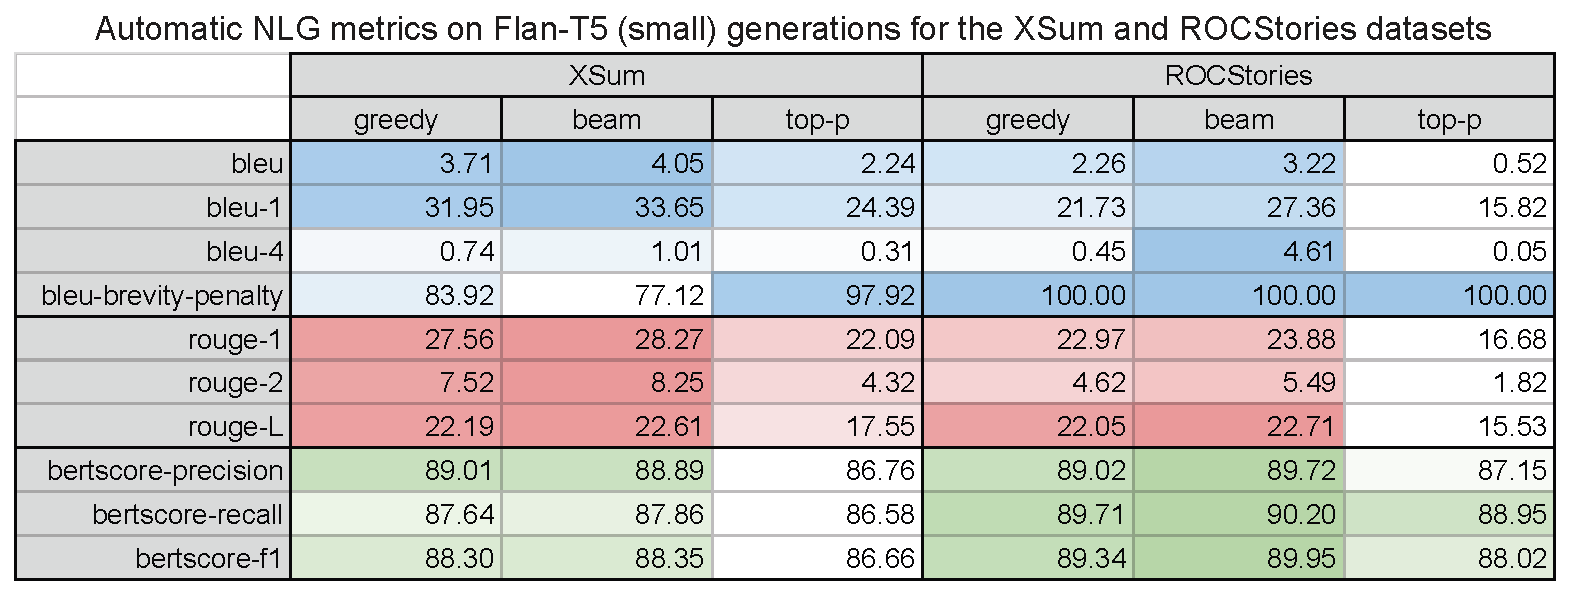


 #### Questions on (3)

1. What is your hypothesis as to why the BLEU-1 and BLEU-4 scores are higher in beam search than greedy search or top-$p$ sampling, for either of the tasks?

2. Why do you think the ROUGE-1 and ROUGE-2 scores are lower for the ROC-stories dataset than the XSUM dataset? Given the nature of ROUGE and the tasks, how would you interpret this result? Find one example from the story generations that could illustrate this case (feel free to write the entry ID instead of the whole Input + Reference + Candidates) and explain why it applies to this.

3. What is your hypothesis as to why the BERTScores (of all three generation styles) demonstrate Flan-T5 as an equally good story generator as a summarizer, compared to the BLEU and ROUGE observations you have made before? Similarly, why do you think top-$p$ is getting relatively better results with the BERTScore than the ROUGE or the BLEU scores? There can be several answers to this so feel free to provide several hypotheses (although one is enough!).

4. What pitfall is a more significant concern for BERTScores than ROUGE and BLEU?

#### Your Answers to (3)

1. From the evaluation table above we see that Beam Search performs better than Greedy Search and Top-p sampling for BLEU-1 and BLEU-4 metrics, both for XSUM and ROCStories dataset.
This happens because of (i) the method of evaluation that BLEU-1 and BLEU-4 exploit for the model performance and (ii) the way Beam Search algorithm works.

    Both metrics are precision-based: They evaluate the model based on how many n-grams of the generated sequence appear in the gold label, compared to the total number of n-grams. This method gives high score when the generated sequence contains as exact matches between the output and gold reference as possible. BLEU-1 counts that based on 1-grams (single words in the sequence) whereas BLEU-4 counts that based on 4-grams (4-word sequences).

    The best method to generate high scoring sequences for BLEU is Beam Search decoding. 
    Beam Search keeps track of multiple paths of the sequence and chooses tokens that will give the globally optimal score. Because of this, Beam Search results in generations that the likelihood of their words to appear together and match the gold reference is high.

    On the other hand, Greedy Seach and Top-p sampling select a token based on the probabilities at each step of the generation, selecting the one that leads to the locally optimal solution, without considering the overall global score. 
    For this reason, Beam Search performs better for BLEU-1 and BLEU-4.


<br>

2. ROCStories dataset is used for story generation, where the model is required to complete a five-sentence story, using as input the first four sentences. 
XSUM dataset uses the model to summarize text. Because of the nature of the tasks, ROCStories require the model to generate more diverse outputs with more tokens, whereas XSUM requires the model to output generations that contain words appearing in the initial paragraph and gold label to get better summarizations.

    ROUGE-1 and ROUGE-2 are recall-based metrics: They evaluate a generated sequence based on how many relevant n-grams are generated, compared to the gold label. Thus, given that ROCStories generations are more creative, with more diverse tokens and sequences, they get a lower recall score, while XSUM generations are rated higher, because as described above, they contain more tokens appearing in the gold labels. 

    An example of such case is the following sample of the file:
    
    {\
			"Entry ID": 318, \
			"Input": "Write the story ending:\nDanny wanted  to  learn  how  to  make  fried  rice. His  friend  decided  to  teach him. His friend went to his house and taught him. Danny tried making it for himself.",\
			"Gold reference": "Danny did a great job.",\
			"Greedy candidate": "Danny was a good cook and he was a good cook.",\
			"Beam candidate": "Danny's friend taught him how to make fried rice.",\
			"Top-p candidate": "Danny was embarrassed to learn that she hated brown rice. Despite this warning, it helped the group to eat."\
	}

    We see that the gold label is "Danny did a great job." and beam candidate is "Danny's friend taught him how to make fried rice." Based on the input sentences, the result of beam search summarizes nicely the story, and is an actually good candidate. However, because it does not contain similar words to gold label, it will get a lower ROUGE score. 

<br>

3. By examining the evaluation table of Flan-T5, we see that BERTScore metrics rank the model as an equally good summarizer (XSUM) and story generator (ROCStories). 
BERTScore exploits contextualized embeddings to evaluate a sentence, instead of the exact matching method used by BLEU and ROUGE. 
Thus, a possible reason of such results could be that in both tasks, the generations of the model are paraphrases: They contain words that might have close meaning with the gold label, but are not exact matches. In such cases, BERTScore would give good scores to the generations, while BLEU and ROUGE will give lower scores duo to less exact matches. 

    We also see that top-p sampling has relatively better scores for BERTScores compared to BLEU and ROUGE. The reason of this could be based on the same observation we did above. Using top-p sampling, in every step of the generation the token that the model generates might not be an exact match according to the gold label, but might have close semantic meaning, and thus this generation gets better score with BERTScore metric. 

<br>

4. A significant pitfall regarding BERTScore is the fact that in some scenarios, calculating the scoring based on embeddings could mistakenly give higher score to sequences, based on the task. Consider the following scenario: We design a text summarization model that summarizes a customer's description for a product. A possible input could be a paragraph of customer describing that he wants to buy the videogame "Legend of Zelda" for "Nitendo Switch". 
The generation of the model could be "Customer wants the game Jedi: Survivor", for "PS5". Using BERTScore, because "Legend of Zelda" and "Jedi: Survivor" are both videogames, and both Nitendo Switch and PS5 are consoles, we would get a high score for this generation, but unfortunately, for our goal, this type of generation is wrong. If we used ROUGE or BLEU scores, which are based on exact-match, we would not get a very good score for this summarization, which is what we wanted.

    This observation could be generalized for many cases of text summarization, where most of the times we would like to include exact same words in the generated sequence, that they also appear in the gold label. This shows that when evaluating a model, it is crucial to include various scoring metrics to decide if it works well or not.

    We could also try to solve the problem shown in the above scenario by modifying BERTScore's embeddings: We could retrain the pretrained BERT model to training examples that match what we want to in our task. 


    <u>Bonus (Opposite of the Question)</u>:According to the official [paper](https://openreview.net/pdf?id=SkeHuCVFDr), BERTScore addresses two common pitfalls that are not of significant concern in n-gram-based metrics such as BLEU and ROUGE. 

    * Pitfall 1: The BLEU and ROUGE scores fail to correctly evaluate paraphrases of the given gold label. 
    Because they respectively count precision and recall based on occurences of n-grams in generations that also appear in the gold labels, such metrics may misevaluate models that produce actually good paraphrased results, although the exact same words might not be present in the generated sequence. 
    BERTScore, which instead of exact matches, computes a soft token cosine similarity value using the respective BERT-family model's contextual embeddings, is able to correctly evaluate model outputs that may paraphrase the content of the gold label. 
    
    * Pitfall 2: The BLEU and ROUGE metrics fail to capture distant dependencies and penalize semantically-critical ordering changes. In contrast, the contextualized embeddings of BERTScore are trained to effectively capture distant dependencies and ordering.


## **PART 4: Checklist**
---

<div style="padding:15px 15px 15px 15px;border-left:3px solid #8e7cc3;background-color:#e4e1eb;border-radius: 15px;">

🎉 Excellent work! You just reached the end of the assignment. 

To give us the deliverables you will have to commit and push the following files to your github classroom repository:

- [ ] The python files:
    - [ ] `a3_decoding.py`
    - [ ] `a3_sampling.py`
    - [ ] `a3_utils.py`, if you added any helper functions


- [ ] This jupyter notebook `a3_notebook.py` with 
    - [ ] the answers to Part 2 written out in their corresponding cells.
        - [ ] Answers to (2.1) questions
        - [ ] Answers to (2.2) questions
        - [ ] Answers to (2.3) questions
        - [ ] Answers to (2.4) questions
    - [ ] the answers to Part 3 written out in its corresponding cell.

</div>